In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import pearsonr
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("stock_prices_latest.csv")
daily_return = df

In [3]:
df.head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0


In [4]:
to_drop = ["open","high","low","close_adjusted","split_coefficient"]

In [5]:
df.drop(to_drop, inplace=True, axis=1)

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
start2 = datetime(2019, 1, 20)
end2 = datetime(2019, 4, 20)
compare_df = df[df["date"] > start2]
compare_df = compare_df[compare_df["date"] < end2]

In [8]:
start = datetime(2020, 1, 20)
df = df[df["date"] > start]

In [9]:
df.head()

,symbol,date,close,volume
21832498,CHCO,2020-01-21,80.5400,47828
21832502,CHDN,2020-01-21,143.2700,192284
21832513,CHFS,2020-01-21,1.0899,498583
21832521,CHI,2020-01-21,11.2800,264962
21832527,CHKP,2020-01-21,113.8900,998251


In [10]:
compare_df.head()

,symbol,date,close,volume
18056482,MXWL,2019-01-22,3.13,684721
18056499,MXWL,2019-01-25,2.85,322918
18056520,MXWL,2019-01-28,2.86,147678
18056529,MXWL,2019-01-29,2.82,107149
18056546,MXWL,2019-01-23,3.01,450974


In [11]:
sector = pd.read_csv("sector_info.csv")

In [12]:
sector.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [13]:
to_drop = ["SEC filings","Date first added","CIK","Founded"]
sector.drop(to_drop, inplace=True, axis=1)

In [14]:
sector.head()

,Symbol,Security,GICS Sector,GICS Sub Industry,Headquarters Location
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota"
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois"
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois"
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,"Danvers, Massachusetts"
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,"Dublin, Ireland"


In [15]:
check = pd.merge(df, sector, left_on='symbol', right_on='Symbol', how='inner')
check.head()

,symbol,date,close,volume,Symbol,Security,GICS Sector,GICS Sub Industry,Headquarters Location
0,CHRW,2020-01-21,80.20,1497209,CHRW,C. H. Robinson Worldwide,Industrials,Air Freight & Logistics,"Eden Prairie, Minnesota"
1,CHRW,2020-01-22,80.31,1045587,CHRW,C. H. Robinson Worldwide,Industrials,Air Freight & Logistics,"Eden Prairie, Minnesota"
2,CHRW,2020-01-23,79.80,1078002,CHRW,C. H. Robinson Worldwide,Industrials,Air Freight & Logistics,"Eden Prairie, Minnesota"
3,CHRW,2020-01-30,72.64,1931556,CHRW,C. H. Robinson Worldwide,Industrials,Air Freight & Logistics,"Eden Prairie, Minnesota"
4,CHRW,2020-01-31,72.22,2211674,CHRW,C. H. Robinson Worldwide,Industrials,Air Freight & Logistics,"Eden Prairie, Minnesota"


In [16]:
compare_check = pd.merge(compare_df, sector, left_on='symbol', right_on='Symbol', how='inner')
compare_check.head()

,symbol,date,close,volume,Symbol,Security,GICS Sector,GICS Sub Industry,Headquarters Location
0,CXO,2019-01-29,117.62,408293,CXO,Concho Resources,Energy,Oil & Gas Exploration & Production,"Midland, Texas"
1,CXO,2019-01-24,116.08,1272243,CXO,Concho Resources,Energy,Oil & Gas Exploration & Production,"Midland, Texas"
2,CXO,2019-01-23,115.23,2578143,CXO,Concho Resources,Energy,Oil & Gas Exploration & Production,"Midland, Texas"
3,CXO,2019-01-28,115.99,1268949,CXO,Concho Resources,Energy,Oil & Gas Exploration & Production,"Midland, Texas"
4,CXO,2019-01-22,118.31,2293099,CXO,Concho Resources,Energy,Oil & Gas Exploration & Production,"Midland, Texas"


In [17]:
std = check['close'].groupby(check['symbol']).std()
std.head(5)

symbol
A        7.405420
AAL      7.425101
AAP     20.855513
AAPL    31.004951
ABBV     8.206341
Name: close, dtype: float64

In [18]:
compare_std = compare_check['close'].groupby(compare_check['symbol']).std()
compare_std.head(5)

symbol
A        2.739955
AAL      1.995633
AAP      8.083790
AAPL    13.806054
ABBV     2.230983
Name: close, dtype: float64

In [19]:
robust = pd.merge(std, sector, left_on='symbol', right_on='Symbol', how='inner')
compare_robust = pd.merge(compare_std, sector, left_on='symbol', right_on='Symbol', how='inner')

In [20]:
robust_result = robust['close'].groupby(robust['GICS Sector']).mean()
sub_robust_result = robust['close'].groupby(robust['GICS Sub Industry']).mean()

In [21]:
compare_robust_result = compare_robust['close'].groupby(compare_robust['GICS Sector']).mean()
compare_sub_robust_result = compare_robust['close'].groupby(compare_robust['GICS Sub Industry']).mean()

In [22]:
robust_result.sort_values()

GICS Sector
Consumer Staples           7.644788
Utilities                  9.118192
Energy                    12.456099
Materials                 13.549650
Communication Services    16.270865
Financials                16.342885
Information Technology    16.374871
Real Estate               16.520585
Health Care               18.089077
Industrials               20.552895
Consumer Discretionary    34.491221
Name: close, dtype: float64

In [23]:
sub_robust_result.sort_values()

GICS Sub Industry
Food Retail                                       1.873144
Alternative Carriers                              2.127494
Thrifts & Mortgage Finance                        2.210343
Copper                                            2.358521
Publishing                                        2.450327
Hotel & Resort REITs                              2.864800
Housewares & Specialties                          3.336882
Integrated Telecommunication Services             3.379858
Automobile Manufacturers                          4.047685
Drug Retail                                       4.118013
Specialized Consumer Services                     4.279137
Independent Power Producers & Energy Traders      4.450765
Broadcasting                                      4.527669
Construction & Engineering                        4.655753
Agricultural Products                             5.005212
Personal Products                                 5.128039
Interactive Home Entertainment        

In [24]:
compare_robust_result.sort_values()

GICS Sector
Utilities                  2.141295
Energy                     2.453702
Financials                 3.512715
Real Estate                4.010240
Consumer Staples           4.157010
Materials                  4.306840
Industrials                5.196431
Information Technology     6.826658
Communication Services     7.665968
Health Care                8.789233
Consumer Discretionary    10.713599
Name: close, dtype: float64

In [25]:
compare_sub_robust_result.sort_values()

GICS Sub Industry
Publishing                                       0.275069
Thrifts & Mortgage Finance                       0.484188
Automobile Manufacturers                         0.637675
Hotel & Resort REITs                             0.718720
Independent Power Producers & Energy Traders     0.753305
Agricultural Products                            0.780494
Specialized Consumer Services                    0.784819
Copper                                           0.849985
Broadcasting                                     0.985443
Department Stores                                1.106330
Alternative Carriers                             1.181683
Oil & Gas Equipment & Services                   1.185262
Gold                                             1.239445
Industrial REITs                                 1.370359
Oil & Gas Storage & Transportation               1.385794
Integrated Telecommunication Services            1.396475
Health Care REITs                                1.422

In [26]:
GICS_Sector = pd.merge(robust_result, compare_robust_result, left_on='GICS Sector', right_on='GICS Sector', how='inner')
GICS_Sector['rate'] = GICS_Sector.apply(lambda x: x['close_x'] / x['close_y'], axis=1)
GICS_Sector.sort_values(by=['rate'])

,close_x,close_y,rate
GICS Sector,,,
Consumer Staples,7.644788,4.157010,1.839011
Health Care,18.089077,8.789233,2.058095
Communication Services,16.270865,7.665968,2.122480
Information Technology,16.374871,6.826658,2.398666
Materials,13.549650,4.306840,3.146077
Consumer Discretionary,34.491221,10.713599,3.219387
Industrials,20.552895,5.196431,3.955194
Real Estate,16.520585,4.010240,4.119600
Utilities,9.118192,2.141295,4.258260


In [27]:
GICS_Sub_Industry = pd.merge(sub_robust_result, compare_sub_robust_result, left_on='GICS Sub Industry', right_on='GICS Sub Industry', how='inner')
GICS_Sub_Industry['rate'] = GICS_Sub_Industry.apply(lambda x: x['close_x'] / x['close_y'], axis=1)
GICS_Sub_Industry.sort_values(by=['rate'])


,close_x,close_y,rate
GICS Sub Industry,,,
Drug Retail,4.118013,6.796012,0.605946
Food Retail,1.873144,2.104827,0.889928
Personal Products,5.128039,5.627646,0.911223
Communications Equipment,11.769554,11.742986,1.002262
Hypermarkets & Super Centers,9.095818,7.897254,1.151770
Housewares & Specialties,3.336882,2.527558,1.320200
Interactive Home Entertainment,5.722517,4.327372,1.322400
Tobacco,6.349943,4.773681,1.330199
Managed Health Care,25.591318,19.189902,1.333583


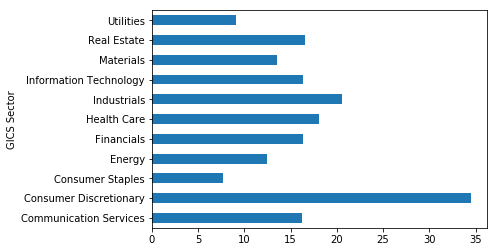

In [34]:
robust_result.plot(x='GICS Sector',y='close',kind='barh')

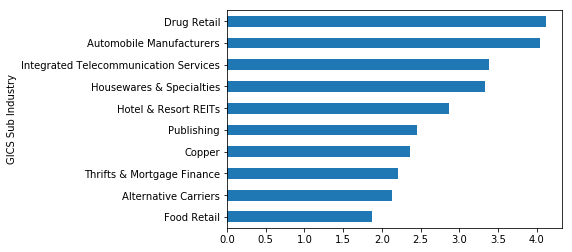

In [35]:
sub_robust_result.sort_values().head(10).plot(x='GICS Sub Industry',y='close',kind='barh')

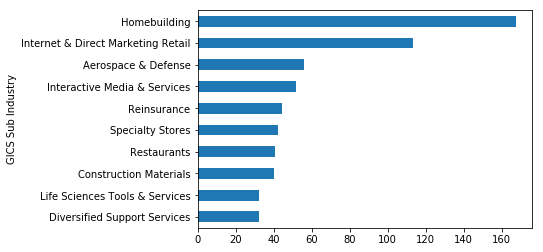

In [36]:
sub_robust_result.sort_values().tail(10).plot(x='GICS Sub Industry',y='close',kind='barh')

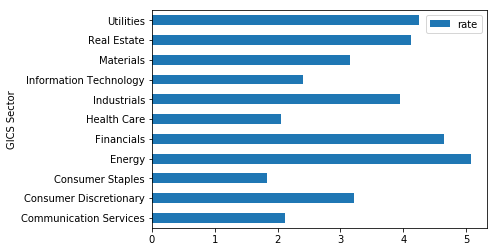

In [37]:
GICS_Sector.plot(y = 'rate', kind='barh')

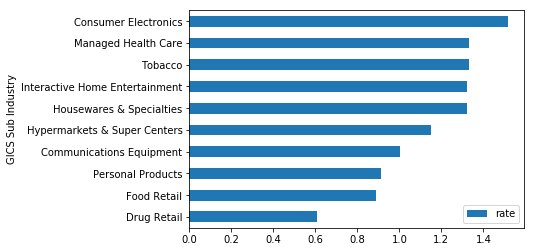

In [38]:
GICS_Sub_Industry.sort_values(by=['rate']).head(10).plot(y = 'rate', kind='barh')

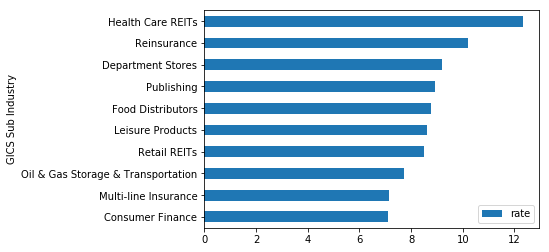

In [39]:
GICS_Sub_Industry.sort_values(by=['rate']).tail(10).plot(y = 'rate', kind='barh')